<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [12]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
@doc Lagrangien_Augmente

#### Objet

Résolution des problèmes de minimisation avec une contrainte d'égalité scalaire par l'algorithme du lagrangien augmenté.

#### Syntaxe

```julia
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Entrées

  * algo : (String) l'algorithme sans contraintes à utiliser:

      * "newton"  : pour l'algorithme de Newton
      * "cauchy"  : pour le pas de Cauchy
      * "gct"     : pour le gradient conjugué tronqué
  * f : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction
  * hessf       : (Function) la hessienne de la fonction
  * c     : (Function) la contrainte [x est dans le domaine des contraintes ssi $c(x)=0$]
  * gradc : (Function) le gradient de la contrainte
  * hessc : (Function) la hessienne de la contrainte
  * x0 : (Array{Float,1}) la première composante du point de départ du Lagrangien
  * options : (Array{Float,1})

    1. epsilon     : utilisé dans les critères d'arrêt
    2. tol         : la tolérance utilisée dans les critères d'arrêt
    3. itermax     : nombre maximal d'itération dans la boucle principale
    4. lambda0     : la deuxième composante du point de départ du Lagrangien
    5. mu0, tho    : valeurs initiales des variables de l'algorithme

#### Sorties

  * xmin : (Array{Float,1}) une approximation de la solution du problème avec contraintes
  * fxmin : (Float) $f(x_{min})$
  * flag : (Integer) indicateur du déroulement de l'algorithme

      * 0    : convergence
      * 1    : nombre maximal d'itération atteint
      * (-1) : une erreur s'est produite
  * niters : (Integer) nombre d'itérations réalisées
  * muks : (Array{Float64,1}) tableau des valeurs prises par mu_k au cours de l'exécution
  * lambdaks : (Array{Float64,1}) tableau des valeurs prises par lambda_k au cours de l'exécution

#### Exemple d'appel

```julia
using LinearAlgebra
algo = "gct" # ou newton|gct
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
c(x) =  (x[1]^2) + (x[2]^2) -1.5
gradc(x) = [2*x[1] ;2*x[2]]
hessc(x) = [2 0;0 2]
x0 = [1; 0]
options = []
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Tolérances des algorithmes appelés

Pour les tolérances définies dans les algorithmes appelés (Newton et régions de confiance), prendre les tolérances par défaut définies dans ces algorithmes.


3. Vérifier que les tests ci-dessous passent.

In [13]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = false

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

Test Summary:            | Pass  Total  Time
Test lagrangien augmente |   12     12  1.5s


In [14]:
using LinearAlgebra
using Markdown
using Plots       

include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")


# Affichage les sorties de l'algorithme des Régions de confiance
function afficher(algo,nom_fct,nom_contrainte,point_init,xmin,fxmin,flag,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init,"\n","avec la contrainte ",nom_contrainte," = 0", ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("")
end
x011 = [1.; 1. ;2.]
x012 = [0. ;1. ;-0.8]
x013 = [0. ;1. ;0.8]
x014 = [0. ;1. ;0.]
# probleme 1
f1(x) = 2*(x[1]+x[2]+x[3]-3)^2 + (x[1]-x[2])^2 + (x[2]-x[3])^2
grad_f1(x) = [4*(x[1]+x[2]+x[3]-3) + 2*(x[1]-x[2]);4*(x[1]+x[2]+x[3]-3) - 2*(x[1]-x[2]) + 2*(x[2]-x[3]) ;4*(x[1]+x[2]+x[3]-3) - 2*(x[2]-x[3]) ]
hessienne_f1(x) = [6. 2. 4. ; 2. 8. 2. ; 4. 2. 6.] 
contrainte_1(x) = x[1] + x[3] - 1
grad_contrainte_1(x) = [1 ;0;1]
hess_contrainte_1(x) = [0 0 0;0 0 0; 0 0 0]


xmin,fxmin,flag,iter, lambdaks, muks  = Lagrangien_Augmente("newton",f1,contrainte_1,grad_f1,hessienne_f1,grad_contrainte_1,hess_contrainte_1,x011,[])
#print("lambdaks : ")
#println(lambdaks)
afficher("Lagrangien Augmenté","f1","contrainte_1",x011,xmin,fxmin,flag,iter)

xmin,fxmin,flag,iter, lambdaks, muks = Lagrangien_Augmente("newton",f1,contrainte_1,grad_f1,hessienne_f1,grad_contrainte_1,hess_contrainte_1,x012,[])

#=print("lambdaks : ")
println(lambdaks)
println("")
print("muks : ")
println(muks)=#
afficher("Lagrangien Augmenté","f1","contrainte_1",x012,xmin,fxmin,flag,iter)

#=xmin,fxmin,flag,iter, lambdaks, muks = Lagrangien_Augmente("newton",f1,contrainte_1,grad_f1,hessienne_f1,grad_contrainte_1,hess_contrainte_1,x013,[])
print("lambdaks : ")
println(lambdaks)
afficher("Lagrangien Augmenté","f1","contrainte_1",x011,xmin,fxmin,flag,iter)

xmin,fxmin,flag,iter, lambdaks, muks = Lagrangien_Augmente("newton",f1,contrainte_1,grad_f1,hessienne_f1,grad_contrainte_1,hess_contrainte_1,x014,[])
print("lambdaks : ")
println(lambdaks)
afficher("Lagrangien Augmenté","f1","contrainte_1",x011,xmin,fxmin,flag,iter)=#
#it = 1:length(lambdaks[1,:])'


-------------------------------------------------------------------------
Résultats de : Lagrangien Augmenté appliqué à f1 au point initial [1.0, 1.0, 2.0]
avec la contrainte contrainte_1 = 0:
  * xsol = [0.5000000000004291, 1.2499999999997855, 0.5000000000004291]
  * f(xsol) = 2.2499999999961386
  * nb_iters = 9
  * flag = 0

-------------------------------------------------------------------------
Résultats de : Lagrangien Augmenté appliqué à f1 au point initial [0.0, 1.0, -0.8]
avec la contrainte contrainte_1 = 0:
  * xsol = [0.5000000000004291, 1.2499999999997855, 0.5000000000004291]
  * f(xsol) = 2.2499999999961386
  * nb_iters = 9
  * flag = 0



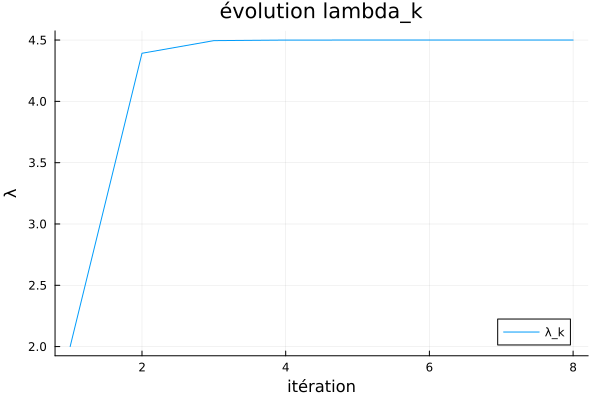

In [15]:
it = 1:length(lambdaks)
plot(it,lambdaks',label="λ_k",title="évolution lambda_k",xlabel="itération",ylabel="λ",legend=:bottomright)


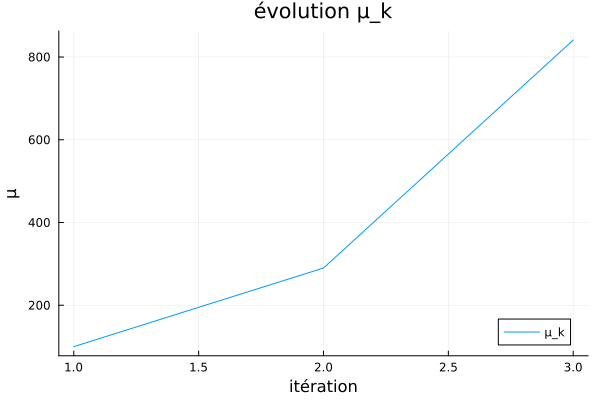

In [16]:

it = 1:length(muks)
plot(it,muks',label="μ_k",title="évolution μ_k",xlabel="itération",ylabel="μ",legend=:bottomright)


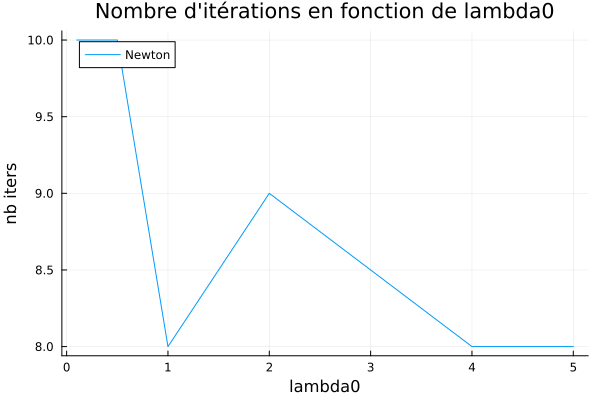

In [17]:
using Plots

include("Lagrangien_Augmente.jl")

listeLambda0 = [0.1, 0.5, 1, 2, 4, 5]
listenb_iter = []

# initialisation des paramètres avec un petit lambda0
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]

for lambda0 in listeLambda0
	options[4] = lambda0
	xmin,fxmin,flag,nb_iter,_,lambdaks = Lagrangien_Augmente("cauchy",fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,
			hess_contrainte1,pts2.x01,options)
	push!(listenb_iter, nb_iter)
end

plot(listeLambda0, listenb_iter, label="Newton", xlabel="lambda0", ylabel="nb iters", title="Nombre d'itérations en fonction de lambda0", legend=:topleft)



In [19]:
using Plots

include("Lagrangien_Augmente.jl")

listeMu0 = [0.1, 0.5, 1, 2, 4, 5]
listenb_iter = []

# initialisation des paramètres avec un petit lambda0
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]

for mu0 in listeLambda0
	options[5] = mu0
	xmin,fxmin,flag,nb_iter,_,lambdaks = Lagrangien_Augmente("cauchy",fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,
			hess_contrainte1,pts2.x01,options)
	push!(listenb_iter, nb_iter)
end

plot(listeLambda0, listenb_iter, label="Newton", xlabel="mu0", ylabel="nb iters", title="Nombre d'itérations en fonction de mu0", legend=:topri)



ErrorException: Invalid symbol for legend: topri

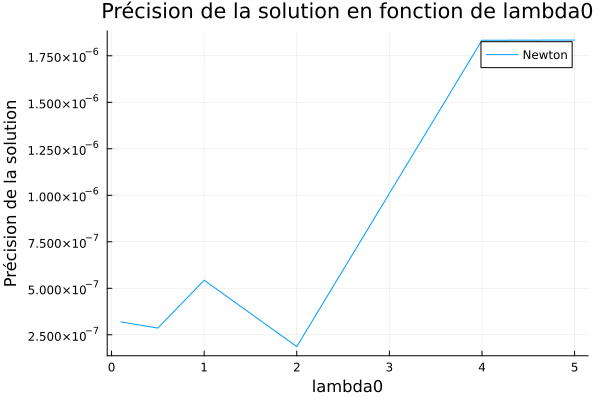

In [20]:
using Plots

include("Lagrangien_Augmente.jl")

listeLambda0 = [0.1, 0.5, 1, 2, 4, 5]
liste_sol = []

# initialisation des paramètres avec un petit lambda0
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
sol_fct1_augm = [0.5 ; 1.25 ; 0.5]

for lambda0 in listeLambda0
	options[4] = lambda0
	xmin,fxmin,flag,nb_iter,_,lambdaks = Lagrangien_Augmente("cauchy",fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,
			hess_contrainte1,pts2.x01,options)
	push!(liste_sol, norm(xmin-sol_fct1_augm))
end

plot(listeLambda0, liste_sol, label="Newton", xlabel="lambda0", ylabel="Précision de la solution", title="Précision de la solution en fonction de lambda0", legend=:topright)


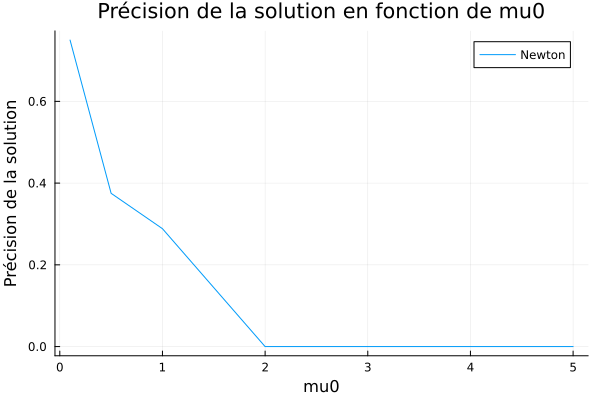

In [21]:
using Plots

include("Lagrangien_Augmente.jl")

listeMu0 = [0.1, 0.5, 1, 2, 4, 5]
liste_sol = []

# initialisation des paramètres avec un petit mu0
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
sol_fct1_augm = [0.5 ; 1.25 ; 0.5]

for mu0 in listeMu0
	options[5] = mu0
	xmin,fxmin,flag,nb_iter,_,lambdaks = Lagrangien_Augmente("cauchy",fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,
			hess_contrainte1,pts2.x01,options)
	push!(liste_sol, norm(xmin-sol_fct1_augm))
end

plot(listeMu0, liste_sol, label="Newton", xlabel="mu0", ylabel="Précision de la solution", title="Précision de la solution en fonction de mu0", legend=:topright)

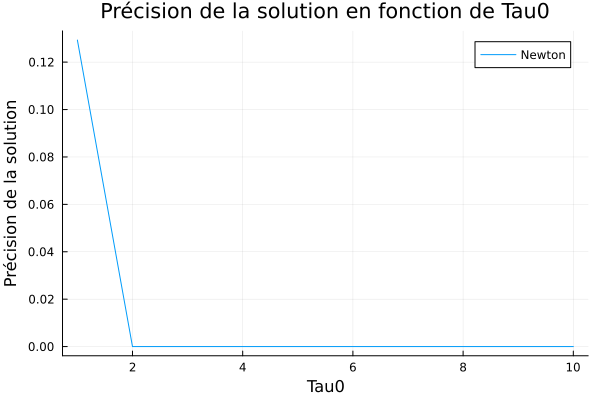

In [22]:
using Plots

include("Lagrangien_Augmente.jl")

listeTau0 = [1,2,3,4, 5, 6, 7, 8, 9, 10]
liste_sol = []

# initialisation des paramètres avec un petit mu0
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1e-2
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
sol_fct1_augm = [0.5 ; 1.25 ; 0.5]

for tau0 in listeTau0
	options[6] = tau0
	xmin,fxmin,flag,nb_iter,_,lambdaks = Lagrangien_Augmente("cauchy",fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,
			hess_contrainte1,pts2.x01,options)
	push!(liste_sol, norm(xmin-sol_fct1_augm))
end

plot(listeTau0, liste_sol, label="Newton", xlabel="Tau0", ylabel="Précision de la solution", title="Précision de la solution en fonction de Tau0", legend=:topright)

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.
 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.

Remarque : Pour tout ses graphiques, on a pris en compte les conditions de stagnations, sinon le nombre d'itérations est toujours égal à itermax.
Pour avoir les graphiques sans conditions de stagnations, il suffit de changer le booleen de true à false ligne 102 de Lagrangien_Augmente.jl .
## Question 1
On remarque que plus $\mu_0$ est grand plus la précision le nombre d'itérations augmentent. On remarque la même chose pour $\lambda_0$. 

## Question 2
Plus on augmente tho plus la solution est précise.
